# Python notebook "Raices ecuaciones algebraicas"

Tratamiento de Datos Experimentales (530.307) 

Author: Esteban Vöhringer-Martinez

# Determinar la concentración en equilibrio 

En algunos casos el polinomio a resolver es de orden mayor o igual a 3 y no se puede resolver analiticamente.


Ejemplo: $CH_4(g) + 2 H_2O(g) <=> CO_2(g) + 4 H_2(g)$


Tarea: Determine la concentación en equilibrio partiendo de 1 mol de metano y 1 mol de agua

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
     return 256*x**5-0.74*(1-x)*(1-2*x)**2

In [3]:
x = np.linspace(1,-1,num=100)

In [4]:
y = f(x)

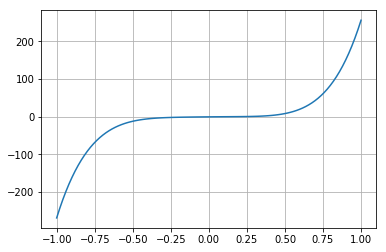

In [5]:
plt.plot(x,y)
plt.grid(True)

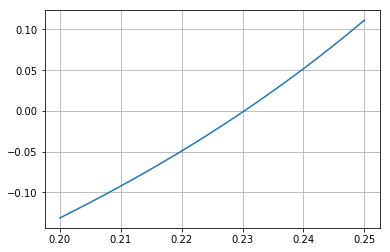

In [6]:
x = np.linspace(0.2,0.25,num=100)
y = f(x)
plt.plot(x,y)
plt.grid(True)

# Métodos cerrados para la busqueda de raices

## Método de la bisección

In [7]:
def bisection(a,b,tol):
    iter = 0
    c = (a+b)/2.0
    while (b-a) > tol: 
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        c_nuevo = (a+b)/2.0
        error_rel = (c_nuevo - c) / c_nuevo * 100
        c = c_nuevo
        print('Iteracion {0:d} c = {1:1.5f} a = {2:1.5f} b = {3:1.5f} error rel. = {4:.5f}%'.format(iter,c,a,b,error_rel))
        iter += 1
    return c

In [9]:
bisection(0.22,0.24,1e-10)

Iteracion 0 c = 0.23500 a = 0.23000 b = 0.24000 error rel. = 2.12766%
Iteracion 1 c = 0.23250 a = 0.23000 b = 0.23500 error rel. = -1.07527%
Iteracion 2 c = 0.23125 a = 0.23000 b = 0.23250 error rel. = -0.54054%
Iteracion 3 c = 0.23062 a = 0.23000 b = 0.23125 error rel. = -0.27100%
Iteracion 4 c = 0.23031 a = 0.23000 b = 0.23062 error rel. = -0.13569%
Iteracion 5 c = 0.23016 a = 0.23000 b = 0.23031 error rel. = -0.06789%
Iteracion 6 c = 0.23023 a = 0.23016 b = 0.23031 error rel. = 0.03393%
Iteracion 7 c = 0.23027 a = 0.23023 b = 0.23031 error rel. = 0.01696%
Iteracion 8 c = 0.23029 a = 0.23027 b = 0.23031 error rel. = 0.00848%
Iteracion 9 c = 0.23028 a = 0.23027 b = 0.23029 error rel. = -0.00424%
Iteracion 10 c = 0.23028 a = 0.23027 b = 0.23028 error rel. = -0.00212%
Iteracion 11 c = 0.23028 a = 0.23027 b = 0.23028 error rel. = -0.00106%
Iteracion 12 c = 0.23027 a = 0.23027 b = 0.23028 error rel. = -0.00053%
Iteracion 13 c = 0.23028 a = 0.23027 b = 0.23028 error rel. = 0.00027%
Iteraci

0.23027468118816616

### Con criterio de convergencia de error relativo

$$ \epsilon_r = \frac{x_{nuevo} - x_{anterior}}{x_{nuevo}} \times 100 \% $$

In [10]:
def bisection_error(a,b,error):
    iter = 0
    c = (a+b)/2.0
    error_rel = 100
    while abs(error_rel) > error:
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        c_nuevo = (a+b)/2.0
        error_rel = (c_nuevo - c) / c_nuevo * 100
        c = c_nuevo
        print('Iteracion {0:d} c = {1:1.5f} a = {2:1.5f} b = {3:1.5f} error = {4:.5f}%'.format(iter,c,a,b,error_rel)) 
        iter += 1
    return c

In [11]:
bisection_error(0.22,0.24,0.1)

Iteracion 0 c = 0.23500 a = 0.23000 b = 0.24000 error = 2.12766%
Iteracion 1 c = 0.23250 a = 0.23000 b = 0.23500 error = -1.07527%
Iteracion 2 c = 0.23125 a = 0.23000 b = 0.23250 error = -0.54054%
Iteracion 3 c = 0.23062 a = 0.23000 b = 0.23125 error = -0.27100%
Iteracion 4 c = 0.23031 a = 0.23000 b = 0.23062 error = -0.13569%
Iteracion 5 c = 0.23016 a = 0.23000 b = 0.23031 error = -0.06789%


0.23015624999999998

*Método de la bisección requiere 5 interacciones para converger a un error relativo de menos de 0.1 %*



## Método de la Falsa posición

In [12]:
def false_position(a,b,tol):
    iter = 0
    c = ( a * f(b) - b * f(a)) / (f(b) - f(a))
    while abs(c-a) > tol:
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        c_nuevo = ( a * f(b) - b * f(a)) / (f(b) - f(a))
        error_rel = (c_nuevo - c) / c_nuevo * 100
        c = c_nuevo
        print('Iteracion {0:d} c = {1:1.5f} a = {2:1.5f} b = {3:1.5f} error = {4:.5f}%'.format(iter,c,a,b,error_rel))
        iter += 1
    return c

In [13]:
false_position(0.22,0.24,1e-5)

Iteracion 0 c = 0.23025 a = 0.22973 b = 0.24000 error = 0.22292%
Iteracion 1 c = 0.23027 a = 0.23025 b = 0.24000 error = 0.01172%
Iteracion 2 c = 0.23027 a = 0.23027 b = 0.24000 error = 0.00062%


0.23027460254190069

### Falsa posición con error relativo

In [14]:
def false_position_error(a,b,error):
    iter = 0
    c = ( a * f(b) - b * f(a)) / (f(b) - f(a))
    error_rel = 100
    while error_rel > error:
        if f(c) == 0:
            return c
        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c
        c_nuevo = ( a * f(b) - b * f(a)) / (f(b) - f(a))
        error_rel = (c_nuevo - c) / c_nuevo * 100
        c = c_nuevo
        print('Iteracion {0:d} c = {1:1.5f} a = {2:1.5f} b = {3:1.5f} error = {4:.5f}%'.format(iter,c,a,b,error_rel))
        iter += 1
    return c

In [15]:
false_position_error(0.22,0.24,0.1)

Iteracion 0 c = 0.23025 a = 0.22973 b = 0.24000 error = 0.22292%
Iteracion 1 c = 0.23027 a = 0.23025 b = 0.24000 error = 0.01172%


0.23027318498664615

*Método de la la falsa posición requiere **solo** 2 interacciones para converger a un error relativo de menos de 0.1 %*

¿Porqué converge más rápido el método de la falsa posición que el de la bisección?

# Métodos abiertos

## Iteración de punto fijo

In [16]:
def f_pf(x):
    return (0.74*(1.00-x)*(1-2*x)**2/256)**(1/5)

In [20]:
iteraciones = 15
x = 0.25
for i in range(iteraciones):
    x_new = f_pf(x)
    x = x_new
    print('iter = {0:d}, x = {1:1.7f}'.format(i,x_new))

iter = 0, x = 0.2222279
iter = 1, x = 0.2334835
iter = 2, x = 0.2289835
iter = 3, x = 0.2307923
iter = 4, x = 0.2300669
iter = 5, x = 0.2303581
iter = 6, x = 0.2302412
iter = 7, x = 0.2302881
iter = 8, x = 0.2302693
iter = 9, x = 0.2302768
iter = 10, x = 0.2302738
iter = 11, x = 0.2302750
iter = 12, x = 0.2302745
iter = 13, x = 0.2302747
iter = 14, x = 0.2302747


In [21]:
print(f_pf(0.25))

0.2222279117637761


## Ejemplo de Newton Raphson fijando número de iteraciones

In [22]:
def df(x):
    return 1280*x**4 + 8.88 * x**2 - 11.84 * x + 3.7

In [23]:
def newton_raphson(inicio, iteraciones):
    x = inicio
    for _ in range(iteraciones):
        x = x - (f(x) / df(x))
    return x    

In [28]:
newton_raphson(1,1)

0.8001155581929198

In [30]:
for n in range(40):
    print('n = {0:d}: {1:2.10f}'.format(n,newton_raphson(1,n)))

n = 0: 1.0000000000
n = 1: 0.8001155582
n = 2: 0.6401670392
n = 3: 0.5120877264
n = 4: 0.4096324418
n = 5: 0.3288638875
n = 6: 0.2699917474
n = 7: 0.2381817668
n = 8: 0.2306113479
n = 9: 0.2302752964
n = 10: 0.2302746812
n = 11: 0.2302746812
n = 12: 0.2302746812
n = 13: 0.2302746812
n = 14: 0.2302746812
n = 15: 0.2302746812
n = 16: 0.2302746812
n = 17: 0.2302746812
n = 18: 0.2302746812
n = 19: 0.2302746812
n = 20: 0.2302746812
n = 21: 0.2302746812
n = 22: 0.2302746812
n = 23: 0.2302746812
n = 24: 0.2302746812
n = 25: 0.2302746812
n = 26: 0.2302746812
n = 27: 0.2302746812
n = 28: 0.2302746812
n = 29: 0.2302746812
n = 30: 0.2302746812
n = 31: 0.2302746812
n = 32: 0.2302746812
n = 33: 0.2302746812
n = 34: 0.2302746812
n = 35: 0.2302746812
n = 36: 0.2302746812
n = 37: 0.2302746812
n = 38: 0.2302746812
n = 39: 0.2302746812


Newton Raphson con criterio de convergencia

In [31]:
def newton_raphson_conv(inicio, convergencia):
    x = inicio
    error = 1e12
    while error >= convergencia:
        x_new = x - (f(x) / df(x))
        error = abs(1 - x_new / x)  
        x = x_new
    return x    

In [32]:
newton_raphson_conv(10,1e-10)

0.23027468115886976

### Estas herramientas ya estan implementadas en python en el módulo scipy
optimize.newton
etc.

In [33]:
from scipy.optimize import *

In [34]:
newton?

In [35]:
newton(f,10)

0.23027468115886976

In [36]:
newton(f,2,maxiter=15)

RuntimeError: Failed to converge after 15 iterations, value is 0.23228172022864949

¿Porque no se uso la derivada para el cálculo?

In [37]:
newton(f,2,maxiter=15,fprime=df)

0.23027468115886976